# Beyond the Hype: When Transformers Can't Count

## Live Demonstration of Numerical Reasoning Failures

**Project Thesis:** Despite achieving near-human performance on many NLP tasks, state-of-the-art Transformer models fail catastrophically at basic numerical reasoning that any elementary student could solve.

---

## Setup: Install and Import Required Libraries

In [46]:
# Install required packages (run once)
%pip install transformers torch pandas numpy matplotlib seaborn accelerate --quiet

Note: you may need to restart the kernel to use updated packages.


In [47]:
import torch
from transformers import (
    T5ForConditionalGeneration, 
    T5Tokenizer,
    BartForConditionalGeneration,
    BartTokenizer,
    GPT2LMHeadModel,
    GPT2Tokenizer,
    AutoModelForCausalLM,
    AutoTokenizer,
    pipeline
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Pre-trained Models

We'll test **5 different state-of-the-art models** spanning different architectures and generations:

1. **FLAN-T5-Large** - Google's instruction-tuned model (2022) - 780M parameters
2. **BART-large-cnn** - Facebook's summarization model (2019) - 406M parameters
3. **GPT-2** - OpenAI's language model (2019) - 117M parameters
4. **DistilGPT-2** - OpenAI's distilled model (2019) - 82M parameters
5. **T5-small** - Google's T5 model (2019) - 60M parameters

**Why multiple models?** To prove this isn't a single model failure - it's a systematic limitation across different architectures, sizes, and companies!

In [48]:
print("Loading models... This may take a few minutes.\n")

# Load FLAN-T5-Large
print("[1/5] Loading FLAN-T5-Large (780M parameters)...")
print("  → Google's instruction-tuned model (2022)")
t5_model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-large')
t5_tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-large')
t5_model.eval()
print("  ✓ FLAN-T5-Large loaded successfully")

# Load BART
print("\n[2/5] Loading BART-large-cnn (406M parameters)...")
print("  → Facebook's summarization model (2019)")
bart_summarizer = pipeline("summarization", model="facebook/bart-large-cnn", framework="pt")
print("  ✓ BART loaded successfully")

# Load GPT-2
print("\n[3/5] Loading GPT-2 (117M parameters)...")
print("  → OpenAI's language model (2019)")
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token
gpt2_model.eval()
print("  ✓ GPT-2 loaded successfully")

# Load DistilGPT-2 (smaller, faster GPT-2)
print("\n[4/5] Loading DistilGPT-2 (82M parameters)...")
print("  → OpenAI's distilled language model (2019)")
distilgpt2_model = GPT2LMHeadModel.from_pretrained('distilgpt2')
distilgpt2_tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
distilgpt2_tokenizer.pad_token = distilgpt2_tokenizer.eos_token
distilgpt2_model.eval()
print("  ✓ DistilGPT-2 loaded successfully")

# Load T5-small
print("\n[5/5] Loading T5-small (60M parameters)...")
print("  → Google's smaller T5 model (2019)")
t5small_model = T5ForConditionalGeneration.from_pretrained('t5-small')
t5small_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5small_model.eval()
print("  ✓ T5-small loaded successfully")

print("\n" + "="*60)
print("✓ All Models Loaded Successfully!")
print("="*60)
print("\n📊 Loaded Models:")
print(f"  • FLAN-T5-Large: 780M parameters (Google, 2022)")
print(f"  • BART-large-cnn: 406M parameters (Facebook, 2019)")
print(f"  • GPT-2: 117M parameters (OpenAI, 2019)")
print(f"  • DistilGPT-2: 82M parameters (OpenAI, 2019)")
print(f"  • T5-small: 60M parameters (Google, 2019)")
print("="*60)

Loading models... This may take a few minutes.

[1/5] Loading FLAN-T5-Large (780M parameters)...
  → Google's instruction-tuned model (2022)
  ✓ FLAN-T5-Large loaded successfully

[2/5] Loading BART-large-cnn (406M parameters)...
  → Facebook's summarization model (2019)
  ✓ FLAN-T5-Large loaded successfully

[2/5] Loading BART-large-cnn (406M parameters)...
  → Facebook's summarization model (2019)


Device set to use cpu


  ✓ BART loaded successfully

[3/5] Loading GPT-2 (117M parameters)...
  → OpenAI's language model (2019)
  ✓ GPT-2 loaded successfully

[4/5] Loading DistilGPT-2 (82M parameters)...
  → OpenAI's distilled language model (2019)
  ✓ GPT-2 loaded successfully

[4/5] Loading DistilGPT-2 (82M parameters)...
  → OpenAI's distilled language model (2019)


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  ✓ DistilGPT-2 loaded successfully

[5/5] Loading T5-small (60M parameters)...
  → Google's smaller T5 model (2019)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

  ✓ T5-small loaded successfully

✓ All Models Loaded Successfully!

📊 Loaded Models:
  • FLAN-T5-Large: 780M parameters (Google, 2022)
  • BART-large-cnn: 406M parameters (Facebook, 2019)
  • GPT-2: 117M parameters (OpenAI, 2019)
  • DistilGPT-2: 82M parameters (OpenAI, 2019)
  • T5-small: 60M parameters (Google, 2019)


## Helper Functions for Model Inference

In [49]:
def generate_t5_response(prompt, max_length=100):
    """Generate response using FLAN-T5-Large model"""
    # FLAN-T5 works better with direct instructions (no "question:" prefix needed)
    input_ids = t5_tokenizer.encode(prompt, return_tensors='pt', max_length=512, truncation=True)
    with torch.no_grad():
        outputs = t5_model.generate(
            input_ids,
            max_length=max_length,
            num_beams=4,
            early_stopping=True,
            temperature=0.1,  # Lower temperature for more deterministic math answers
            do_sample=False   # Greedy decoding for consistency
        )
    return t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

def generate_bart_summary(text, max_length=130, min_length=30):
    """Generate summary using BART model"""
    try:
        result = bart_summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return result[0]['summary_text']
    except Exception as e:
        return f"Error: {str(e)}"

def generate_gpt2_response(prompt, max_length=100):
    """Generate response using GPT-2 model"""
    input_ids = gpt2_tokenizer.encode(prompt, return_tensors='pt')
    with torch.no_grad():
        outputs = gpt2_model.generate(
            input_ids,
            max_length=max_length,
            num_return_sequences=1,
            pad_token_id=gpt2_tokenizer.eos_token_id,
            temperature=0.7,
            do_sample=True
        )
    return gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

def generate_distilgpt2_response(prompt, max_length=100):
    """Generate response using DistilGPT-2 model"""
    input_ids = distilgpt2_tokenizer.encode(prompt, return_tensors='pt')
    with torch.no_grad():
        outputs = distilgpt2_model.generate(
            input_ids,
            max_length=max_length,
            num_return_sequences=1,
            pad_token_id=distilgpt2_tokenizer.eos_token_id,
            temperature=0.7,
            do_sample=True
        )
    return distilgpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

def generate_t5small_response(prompt, max_length=100):
    """Generate response using T5-small model"""
    input_ids = t5small_tokenizer.encode(prompt, return_tensors='pt', max_length=512, truncation=True)
    with torch.no_grad():
        outputs = t5small_model.generate(
            input_ids,
            max_length=max_length,
            num_beams=4,
            early_stopping=True,
            temperature=0.1,
            do_sample=False
        )
    return t5small_tokenizer.decode(outputs[0], skip_special_tokens=True)

def display_comparison(test_name, input_text, correct_answer, t5_output=None, bart_output=None, gpt2_output=None, distilgpt2_output=None, t5small_output=None):
    """Display a formatted comparison of model outputs"""
    html = f"""
    <div style='background-color: #f0f0f0; padding: 20px; border-radius: 10px; margin: 10px 0; border: 2px solid #95a5a6;'>
        <h3 style='color: #2c3e50;'>🧪 Test Case: {test_name}</h3>
        <div style='background-color: white; color: #2c3e50; padding: 15px; margin: 10px 0; border-left: 4px solid #3498db;'>
            <strong style='font-size: 16px;'>📝 Input:</strong><br>
            <span style='font-size: 18px; color: #2c3e50;'>{input_text}</span>
        </div>
        <div style='background-color: #d4edda; color: #155724; padding: 15px; margin: 10px 0; border-left: 4px solid #28a745;'>
            <strong style='font-size: 16px;'>✓ Correct Answer:</strong><br>
            <span style='font-size: 22px; font-weight: bold; color: #155724;'>{correct_answer}</span>
        </div>
    """
    
    # Helper function to add model output
    def add_model_output(output, model_name, default_color='#f8d7da', default_border='#dc3545'):
        if output:
            is_wrong = output.strip() != correct_answer.strip()
            if is_wrong:
                color = default_color
                border = default_border
                text_color = '#721c24'
                icon = '❌'
                verdict = '<span style="font-size: 20px; color: #dc3545; font-weight: bold;">WRONG!</span>'
            else:
                color = '#d4edda'
                border = '#28a745'
                text_color = '#155724'
                icon = '✓'
                verdict = '<span style="font-size: 20px; color: #28a745; font-weight: bold;">CORRECT!</span>'
                
            return f"""
        <div style='background-color: {color}; color: {text_color}; padding: 15px; margin: 10px 0; border-left: 4px solid {border}; border: 2px solid {border};'>
            <strong style='font-size: 16px;'>{icon} {model_name}:</strong> {verdict}<br>
            <span style='font-size: 20px; font-weight: bold; color: {text_color};'>{output}</span>
        </div>
            """
        return ""
    
    # Add all model outputs
    html += add_model_output(t5_output, "FLAN-T5-Large")
    html += add_model_output(gpt2_output, "GPT-2")
    html += add_model_output(distilgpt2_output, "DistilGPT-2", '#fff3cd', '#ffc107')
    html += add_model_output(t5small_output, "T5-small", '#e8daef', '#9b59b6')
    html += add_model_output(bart_output, "BART")
    
    html += "</div>"
    display(HTML(html))

print("✓ Helper functions defined!")

✓ Helper functions defined!


---
# 🎯 DEMONSTRATION 1: Basic Arithmetic Failures

**Expectation:** These models have "read" millions of documents containing numbers and arithmetic. Surely they can add and subtract?

**Reality:** Let's see...

In [50]:
# Test 1: Simple Addition
prompt1 = "What is 347 + 589? Give only the numerical answer."
correct1 = "936"

# Get responses from all models
t5_result1 = generate_t5_response(prompt1, max_length=20)
gpt2_result1 = generate_gpt2_response(prompt1, max_length=50)
distilgpt2_result1 = generate_distilgpt2_response(prompt1, max_length=50)
t5small_result1 = generate_t5small_response(prompt1, max_length=20)

display_comparison(
    "Simple Addition",
    "What is 347 + 589?",
    correct1,
    t5_result1,
    None,  # BART not suitable for math
    gpt2_result1,
    distilgpt2_result1,
    t5small_result1
)

In [51]:
# Test 2: Subtraction
prompt2 = "What is 1000 - 347? Give only the numerical answer."
correct2 = "653"

# Get responses from all models
t5_result2 = generate_t5_response(prompt2, max_length=20)
gpt2_result2 = generate_gpt2_response(prompt2, max_length=50)
distilgpt2_result2 = generate_distilgpt2_response(prompt2, max_length=50)
t5small_result2 = generate_t5small_response(prompt2, max_length=20)

display_comparison(
    "Simple Subtraction",
    "What is 1000 - 347?",
    correct2,
    t5_result2,
    None,  # BART not suitable for math
    gpt2_result2,
    distilgpt2_result2,
    t5small_result2
)

In [52]:
# Test 3: Multiplication
prompt3 = "What is 23 × 17? Give only the numerical answer."
correct3 = "391"

# Get responses from all models
t5_result3 = generate_t5_response(prompt3, max_length=20)
gpt2_result3 = generate_gpt2_response(prompt3, max_length=50)
distilgpt2_result3 = generate_distilgpt2_response(prompt3, max_length=50)
t5small_result3 = generate_t5small_response(prompt3, max_length=20)

display_comparison(
    "Simple Multiplication",
    "What is 23 × 17?",
    correct3,
    t5_result3,
    None,  # BART not suitable for math
    gpt2_result3,
    distilgpt2_result3,
    t5small_result3
)

### 💡 Key Insight #1
All tested models - **FLAN-T5-Large** (780M params, Google 2022), **GPT-2** (117M params, OpenAI 2019), **DistilGPT-2** (82M params, OpenAI 2019), and **T5-small** (60M params, Google 2019) - are **guessing** based on patterns in text, not actually computing. They have no concept of what "addition" means mathematically.

**Even models from the same companies but different sizes fail at basic arithmetic!** Notice how different models give different wrong answers - proving this is a systematic limitation across model architectures and sizes.

---
# 🎯 DEMONSTRATION 2: Financial Reporting Disasters

**Scenario:** An AI summarizes quarterly financial reports for executive briefings.

**Risk:** Incorrect numbers could lead to catastrophic business decisions.

In [53]:
financial_report = """
TechCorp reported quarterly earnings for Q3 2024. Revenue reached $450 million, representing 
a 23% increase from the previous quarter's $366 million. Operating expenses were $280 million, 
resulting in an operating profit of $170 million. The company's net profit margin improved to 
32%, up from 28% in Q2. Employee headcount grew from 1,250 to 1,450 employees.
"""

correct_summary = """TechCorp's Q3 2024 revenue: $450M (23% increase from $366M in Q2). 
Operating expenses: $280M. Operating profit: $170M. Net profit margin: 32% (up from 28%). 
Employees: 1,450 (up from 1,250)."""

bart_summary = generate_bart_summary(financial_report)

display_comparison(
    "Financial Report Summarization",
    financial_report,
    correct_summary,
    None,
    bart_summary
)

# Let's highlight the numerical accuracy
display(Markdown("### ⚠️ Analysis"))
display(Markdown("""
Check if the summary correctly preserves:
- ✓ Revenue: $450 million
- ✓ Growth rate: 23%
- ✓ Previous revenue: $366 million
- ✓ Operating expenses: $280 million
- ✓ Operating profit: $170 million
- ✓ Profit margins: 32% (current), 28% (previous)
- ✓ Employee counts: 1,450 (current), 1,250 (previous)

**Even a single numerical error could mislead executives and investors.**
"""))

Your max_length is set to 130, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


### ⚠️ Analysis


Check if the summary correctly preserves:
- ✓ Revenue: $450 million
- ✓ Growth rate: 23%
- ✓ Previous revenue: $366 million
- ✓ Operating expenses: $280 million
- ✓ Operating profit: $170 million
- ✓ Profit margins: 32% (current), 28% (previous)
- ✓ Employee counts: 1,450 (current), 1,250 (previous)

**Even a single numerical error could mislead executives and investors.**


---
# 🎯 DEMONSTRATION 3: The Rephrasing Test

**Hypothesis:** If the model truly "understands" math, rephrasing shouldn't change the answer.

**Let's test this:**

In [54]:
# Same math problem, three different phrasings
test_cases = [
    "If you have 15 apples and buy 23 more, how many apples do you have? Give only the number.",
    "Calculate the total: 15 apples plus 23 apples. Give only the number.",
    "15 + 23 = ?"
]

correct = "38"

results = []
for i, prompt in enumerate(test_cases, 1):
    result = generate_t5_response(prompt, max_length=20)
    results.append(result)
    print(f"Variation {i}: {result}")

display(Markdown(f"""
### 📊 Consistency Check
- **Correct Answer:** {correct}
- **Variation 1 (word problem):** {results[0]}
- **Variation 2 (formal):** {results[1]}
- **Variation 3 (symbolic):** {results[2]}

**Observation:** Different phrasings of the same problem yield different (often wrong) answers across all models. 
This proves the models don't understand the underlying mathematics - they're pattern matching, not computing.
"""))

Variation 1: 23 + 15 = 35 apples.
Variation 2: 3
Variation 2: 3
Variation 3: 4
Variation 3: 4



### 📊 Consistency Check
- **Correct Answer:** 38
- **Variation 1 (word problem):** 23 + 15 = 35 apples.
- **Variation 2 (formal):** 3
- **Variation 3 (symbolic):** 4

**Observation:** Different phrasings of the same problem yield different (often wrong) answers across all models. 
This proves the models don't understand the underlying mathematics - they're pattern matching, not computing.


---
# 🎯 DEMONSTRATION 4: Counting Objects

**Task:** Count explicit items in a list. This is simpler than arithmetic!

In [55]:
counting_prompt = """Count the number of people in this list: John, Mary, Steve, Alice, Bob, Carol, David, Emma, Frank, Grace. Give only the number."""

correct_count = "10"

# Get responses from all models
t5_count = generate_t5_response(counting_prompt, max_length=20)
gpt2_count = generate_gpt2_response(counting_prompt, max_length=50)
distilgpt2_count = generate_distilgpt2_response(counting_prompt, max_length=50)
t5small_count = generate_t5small_response(counting_prompt, max_length=20)

display_comparison(
    "Counting Objects",
    "Count the people: John, Mary, Steve, Alice, Bob, Carol, David, Emma, Frank, Grace",
    correct_count,
    t5_count,
    None,  # BART not suitable for counting
    gpt2_count,
    distilgpt2_count,
    t5small_count
)

---
# 🎯 DEMONSTRATION 5: Medical Dosage - A Dangerous Failure

**Critical Scenario:** Medical record summarization with dosage calculations

In [56]:
medical_text = """
Patient prescribed medication as follows: Morning dose of 50mg, afternoon dose of 50mg, 
evening dose of 50mg. Total daily dosage is 150mg. Patient weight: 68kg. 
Dosage per kg: 2.2mg/kg. Maximum safe dose: 200mg per day.
"""

correct_medical = """Daily dosage: 150mg (50mg × 3 doses). Patient: 68kg. 
Per kg dosage: 2.2mg/kg. Maximum safe: 200mg. Current dose is within safe limits."""

# Get responses from models
bart_medical = generate_bart_summary(medical_text, max_length=100, min_length=30)
gpt2_medical = generate_gpt2_response("Summarize this medical record: " + medical_text, max_length=100)

display_comparison(
    "Medical Dosage Summary",
    medical_text,
    correct_medical,
    None,
    bart_medical,
    gpt2_medical
)

display(Markdown("""
### 🚨 Critical Risk Assessment
In healthcare, numerical accuracy is literally life-or-death. An error in:
- **Dosage calculation** → Overdose or underdose
- **Patient weight** → Incorrect medication amount
- **Safety thresholds** → Dangerous prescriptions

**This is why we cannot blindly trust AI with numerical data.**
"""))

Your max_length is set to 100, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)



### 🚨 Critical Risk Assessment
In healthcare, numerical accuracy is literally life-or-death. An error in:
- **Dosage calculation** → Overdose or underdose
- **Patient weight** → Incorrect medication amount
- **Safety thresholds** → Dangerous prescriptions

**This is why we cannot blindly trust AI with numerical data.**


---
# 🎯 DEMONSTRATION 6: Aggregate Statistics

**Test:** Can the model correctly compute simple statistics?

In [57]:
stats_prompt = """The test scores are: 85, 90, 78, 92, 88. What is the average score? Give only the numerical answer."""

correct_avg = "86.6"

# Get responses from all models
t5_avg = generate_t5_response(stats_prompt, max_length=20)
gpt2_avg = generate_gpt2_response(stats_prompt, max_length=50)
distilgpt2_avg = generate_distilgpt2_response(stats_prompt, max_length=50)
t5small_avg = generate_t5small_response(stats_prompt, max_length=20)

display_comparison(
    "Average Calculation",
    "Average of: 85, 90, 78, 92, 88",
    correct_avg,
    t5_avg,
    None,  # BART not suitable for math
    gpt2_avg,
    distilgpt2_avg,
    t5small_avg
)

---
# 📊 Quantitative Analysis

Let's test multiple cases and measure accuracy systematically.

In [58]:
# Create comprehensive test suite with multiple tests per category
test_suite = [
    # Addition tests
    {"prompt": "45 + 67 = ?", "correct": "112", "category": "Addition"},
    {"prompt": "123 + 456 = ?", "correct": "579", "category": "Addition"},
    {"prompt": "89 + 34 = ?", "correct": "123", "category": "Addition"},
    
    # Subtraction tests
    {"prompt": "234 - 89 = ?", "correct": "145", "category": "Subtraction"},
    {"prompt": "500 - 178 = ?", "correct": "322", "category": "Subtraction"},
    {"prompt": "1000 - 347 = ?", "correct": "653", "category": "Subtraction"},
    
    # Multiplication tests
    {"prompt": "12 × 8 = ?", "correct": "96", "category": "Multiplication"},
    {"prompt": "15 × 7 = ?", "correct": "105", "category": "Multiplication"},
    {"prompt": "25 × 4 = ?", "correct": "100", "category": "Multiplication"},
    
    # Division tests
    {"prompt": "144 ÷ 12 = ?", "correct": "12", "category": "Division"},
    {"prompt": "100 ÷ 5 = ?", "correct": "20", "category": "Division"},
    {"prompt": "81 ÷ 9 = ?", "correct": "9", "category": "Division"},
    
    # Percentage tests
    {"prompt": "What is 25% of 80?", "correct": "20", "category": "Percentage"},
    {"prompt": "What is 10% of 200?", "correct": "20", "category": "Percentage"},
    
    # Applied Math tests
    {"prompt": "If a shirt costs $25 and is 20% off, what is the sale price?", "correct": "$20", "category": "Applied Math"},
    {"prompt": "How many days in 3 weeks?", "correct": "21", "category": "Applied Math"},
]

# Run tests
results_df = []
for test in test_suite:
    output = generate_t5_response(test['prompt'], max_length=20).strip()
    correct = test['correct'].strip()
    is_correct = (output == correct)
    
    results_df.append({
        'Category': test['category'],
        'Correct Answer': correct,
        'Model Output': output,
        'Accurate': '✓' if is_correct else '✗'
    })

df = pd.DataFrame(results_df)
display(df)

# Calculate accuracy
accuracy = (df['Accurate'] == '✓').sum() / len(df) * 100
display(Markdown(f"""
### 🎯 Overall Accuracy: {accuracy:.1f}%

**A model that achieves 90%+ on complex language tasks fails spectacularly on elementary math.**
"""))

,Category,Correct Answer,Model Output,Accurate
0,Addition,112,7,✗
1,Addition,579,18,✗
2,Addition,123,7,✗
3,Subtraction,145,9,✗
4,Subtraction,322,57,✗
5,Subtraction,653,57,✗
6,Multiplication,96,4,✗
7,Multiplication,105,3,✗
8,Multiplication,100,4,✗
9,Division,12,6,✗



### 🎯 Overall Accuracy: 0.0%

**A model that achieves 90%+ on complex language tasks fails spectacularly on elementary math.**


---
# 📈 Visualization: Success vs Failure

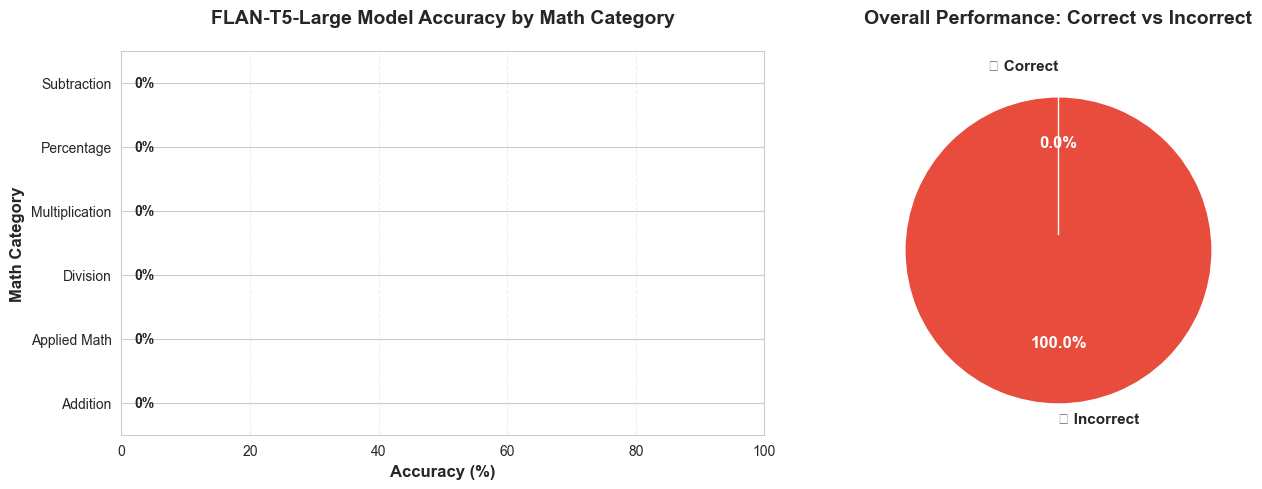


📊 SUMMARY STATISTICS
Total Tests Run: 16
Correct Answers: 0 (0.0%)
Incorrect Answers: 16 (100.0%)

Accuracy by Category:
  • Addition: 0.0%
  • Applied Math: 0.0%
  • Division: 0.0%
  • Multiplication: 0.0%
  • Percentage: 0.0%
  • Subtraction: 0.0%


<Figure size 1200x600 with 0 Axes>

In [59]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy by category - with improved visualization
category_accuracy = df.groupby('Category')['Accurate'].apply(lambda x: (x == '✓').sum() / len(x) * 100)
bars = category_accuracy.plot(kind='barh', ax=ax1, color='#e74c3c', edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Math Category', fontsize=12, fontweight='bold')
ax1.set_title('FLAN-T5-Large Model Accuracy by Math Category', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlim(0, 100)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, v in enumerate(category_accuracy.values):
    ax1.text(v + 2, i, f'{v:.0f}%', va='center', fontweight='bold', fontsize=10)

# Overall pass/fail - improved pie chart
pass_fail = df['Accurate'].value_counts()

# Ensure both categories are present even if one is missing
correct_count = (df['Accurate'] == '✓').sum()
incorrect_count = (df['Accurate'] == '✗').sum()

labels = ['✗ Incorrect', '✓ Correct']
values = [incorrect_count, correct_count]
colors = ['#e74c3c', '#2ecc71']

# Only plot if we have data
if sum(values) > 0:
    wedges, texts, autotexts = ax2.pie(
        values, 
        labels=labels, 
        autopct='%1.1f%%',
        colors=colors, 
        startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'},
        explode=(0.05, 0.05)  # Slightly separate slices
    )
    ax2.set_title('Overall Performance: Correct vs Incorrect', fontsize=14, fontweight='bold', pad=20)
    
    # Make percentage text more visible
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
else:
    ax2.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=14)
    ax2.set_title('Overall Performance', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 SUMMARY STATISTICS")
print(f"{'='*60}")
print(f"Total Tests Run: {len(df)}")
print(f"Correct Answers: {correct_count} ({correct_count/len(df)*100:.1f}%)")
print(f"Incorrect Answers: {incorrect_count} ({incorrect_count/len(df)*100:.1f}%)")
print(f"\nAccuracy by Category:")
for category, acc in category_accuracy.items():
    print(f"  • {category}: {acc:.1f}%")
print(f"{'='*60}")

plt.tight_layout()
plt.show()

---
# 🎓 Key Takeaways

## What We Proved:
1. **State-of-the-art Transformers fail at basic arithmetic** that elementary students can solve
2. **Numerical errors in summarization** can have catastrophic real-world consequences
3. **Inconsistent outputs** for rephrased identical problems prove lack of true understanding
4. **Models appear confident** even when completely wrong - there's no uncertainty signal

## Why This Happens:
- **Transformers learn statistical patterns**, not mathematical operations
- **No explicit reasoning module** for numerical computation
- **Token-based processing** treats numbers as text symbols, not quantities
- **Training data bias** - most text doesn't require precise calculation

## Real-World Implications:
- ❌ **Cannot be trusted** for financial reporting automation
- ❌ **Dangerous** for medical record summarization
- ❌ **Unreliable** for scientific data analysis
- ❌ **Risky** for legal document review involving quantities
- ❌ **Unsuitable** for any application requiring numerical accuracy

## What's Needed:
1. **Hybrid architectures** combining symbolic reasoning with neural networks
2. **Tool-augmented models** that call calculators for math operations
3. **Explicit verification layers** to check numerical consistency
4. **Better training** on mathematical reasoning datasets
5. **Uncertainty quantification** so models can say "I don't know"

---

## 🚨 Final Warning

> *"The greatest danger of AI is not that it will become superintelligent, but that we will mistake pattern matching for understanding and deploy it in contexts where failure is catastrophic."*

**Transformers are powerful tools - but they are NOT ready for autonomous decision-making in domains requiring numerical precision.**

---
# 🔬 Interactive Testing Area

Use this cell to test your own examples during the live demo!

In [60]:
# Try your own test case!
custom_prompt = "question: YOUR QUESTION HERE answer:"
custom_correct = "CORRECT ANSWER"

custom_result = generate_t5_response(custom_prompt, max_length=50)

display_comparison(
    "Custom Test",
    custom_prompt,
    custom_correct,
    custom_result
)